<a href="https://colab.research.google.com/github/akparthiban03/samplerepo/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

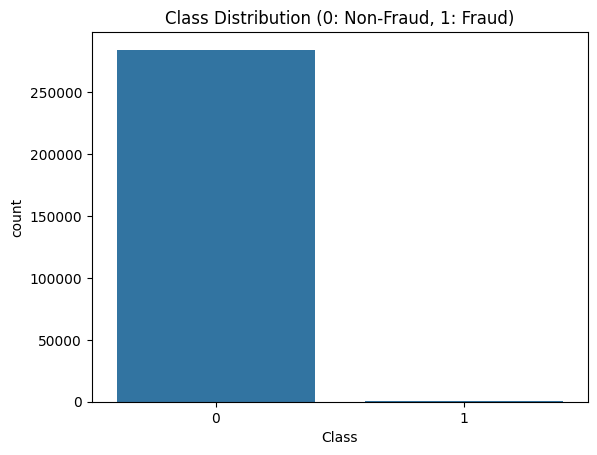

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
df = pd.read_csv("creditcard.csv")

# Step 3: Basic Info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Step 4: Class Distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Step 5: Plot Class Distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Normalize the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop 'Time' column
df = df.drop(['Time'], axis=1)

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Dense(32, input_dim=X_train_res.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Train the model
history = model.fit(
    X_train_res, y_train_res,
    epochs=20,
    batch_size=2048,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7854 - loss: 0.4720 - val_accuracy: 0.9014 - val_loss: 0.1795
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9499 - loss: 0.1361 - val_accuracy: 0.9336 - val_loss: 0.1380
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9611 - loss: 0.1013 - val_accuracy: 0.9530 - val_loss: 0.1086
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9682 - loss: 0.0816 - val_accuracy: 0.9669 - val_loss: 0.0839
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9736 - loss: 0.0685 - val_accuracy: 0.9770 - val_loss: 0.0662
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9782 - loss: 0.0584 - val_accuracy: 0.9855 - val_loss: 0.0510
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9817 - loss: 0.0505 - val_accuracy: 0.9897 - val_loss: 0.0409
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9850 - loss: 0.0436 - val_accuracy: 0

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step


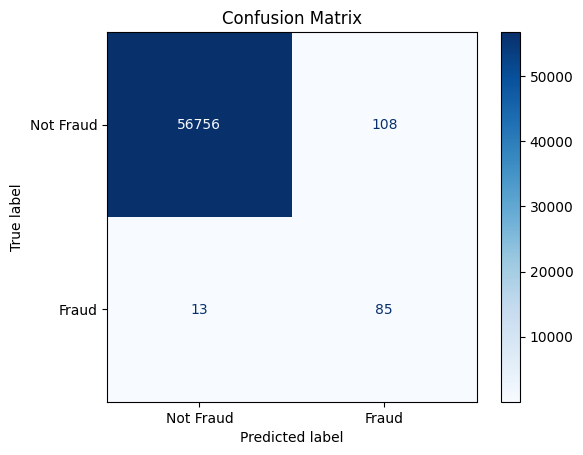

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.44      0.87      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9759


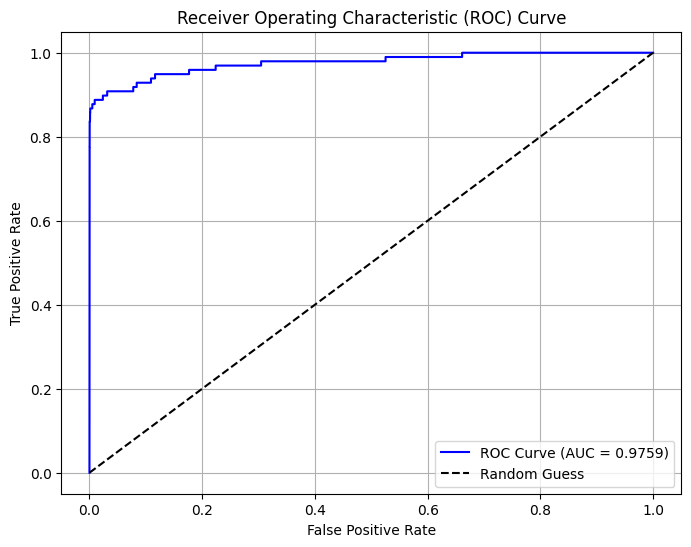

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Predict probabilities
y_pred_prob = model.predict(X_test)

# Step 2: Convert probabilities to binary class (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 4: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Count of each class in the original dataset
fraud_count = df[df['Class'] == 1].shape[0]
non_fraud_count = df[df['Class'] == 0].shape[0]

print(f"✅ Actual Non-Fraud Transactions (Class 0): {non_fraud_count}")
print(f"⚠️ Actual Fraud Transactions (Class 1): {fraud_count}")


✅ Actual Non-Fraud Transactions (Class 0): 284315
⚠️ Actual Fraud Transactions (Class 1): 492
